In [10]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" 
import sympy as sym
import numpy as np
from scipy import signal
from matplotlib import pyplot as plt

In [11]:
s,zeta,omega=sym.symbols('s,zeta,omega')
G=omega**2/(s**2+2*zeta*omega*s+omega**2)
G

omega**2/(omega**2 + 2*omega*s*zeta + s**2)

In [15]:
G_subs=G.subs({zeta:1,omega:10})
G_subs

100/(s**2 + 20*s + 100)

In [19]:
import control as ct
ct.bode_plot(G_subs,plot=True)

AttributeError: 'Mul' object has no attribute 'isctime'

AttributeError: Line2D.set() got an unexpected keyword argument 'legends'

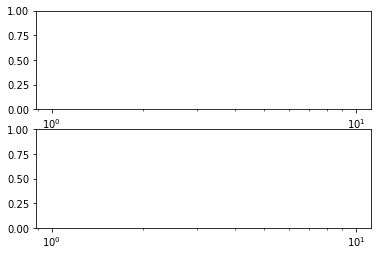

In [13]:
import control as ct
import matplotlib.pyplot as plt
import math
import numpy as np
psiList = [0.05,0.2,0.5,0.707,1.0]
sysTfList=[]
for psi in psiList:
    sysTfList.append(ct.tf([1],[1,2*psi,1]))

mag,phase,omega=ct.bode(sysTfList,omega=np.logspace(start=-1,stop=1,num=200),dB=True,deg=False,
                          legends=['0.05','0.2','0.5','0.707','1.0'])

plt.show()



## Plot Zero Pole

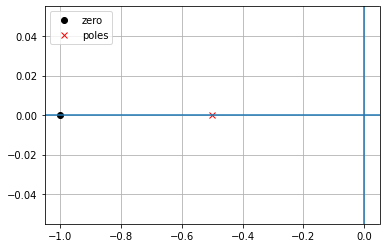

In [ ]:

# from sympy.physics.control.control_plots import pole_zero_plot
plt.plot(z.real,z.imag,'o',color='black',label='zero')
plt.plot(p.real,p.imag,'x',color='red',label='poles')
plt.axhline(0)
plt.axvline(0)
plt.grid()
plt.legend()
# sym.pole_zero_plot

## Step Response

In [ ]:
G
t, y = signal.step(G)
plt.plot(t, y)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Step response for G')
plt.grid()

NameError: name 'G' is not defined

## Bode Plot

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

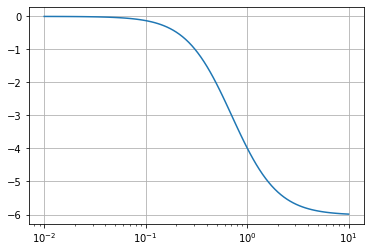

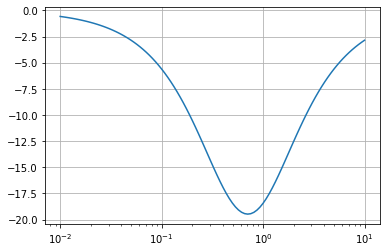

In [ ]:
w, mag, phase = signal.bode(G)
plt.figure()
plt.semilogx(w, mag)    # Bode magnitude plot
plt.grid()
plt.figure()
plt.semilogx(w, phase)  # Bode phase plot
plt.grid()
plt.show()